In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
path1 = "bridge.jpg" 
image1 = cv2.imread(path1)

In [3]:
# It must be 3 demensional
image1.shape # 3 is colors of Red, Green, Blue

(1280, 1920, 3)

In [4]:
image_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

In [5]:
# Now it should be 2 demensional
image_gray.shape

(1280, 1920)

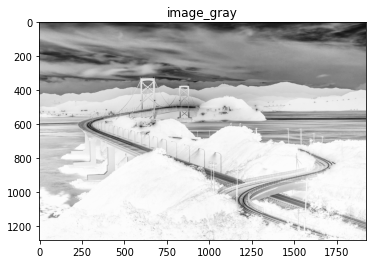

In [6]:
plt.imshow(image_gray,  cmap="Greys")
plt.title("image_gray")
plt.show()

In [7]:
# Depending on the Matplotlib version, the picture's quality will be smoothed
# and noisy will not be showns, lower sharpness
import matplotlib
print(matplotlib.__version__)
# Or the interpolation as Eetu suggested
# interpolation="nearest" or interpolation="none"

3.3.2


In [8]:
# EFFECT 1: DENOISE

# Denoise the picture via setting value for the kernel
# Scanning using kernel_blurring by taking (average of each pixel)/9 with its neigbour ones
# >> Blurred-effect
kernel_blurring = np.array([
    [1,1,1],
    [1,1,1],
    [1,1,1], 
])/9    

In [9]:
image_blurred = cv2.filter2D(image_gray, -1, kernel_blurring)

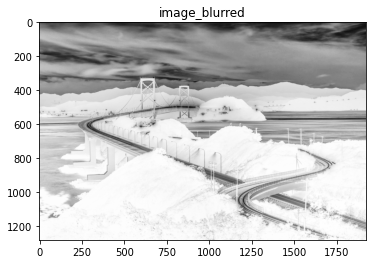

In [10]:
plt.imshow(image_blurred,  cmap="Greys")
plt.title("image_blurred")
plt.show()

In [11]:
# EFFECT 2: EDGE-DETECTION

kernel_edge = np.array([
    [-1,-1,-1],
    [-1,8,-1], # 8 will balance it 8x(-1) + 8 = 0
    [-1,-1,-1],
])

In [12]:
image_edges = cv2.filter2D(image_gray, -1, kernel_edge)

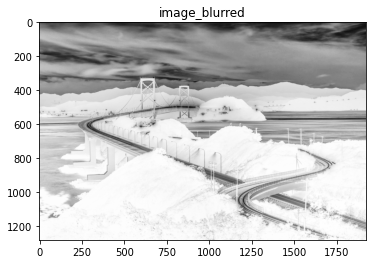

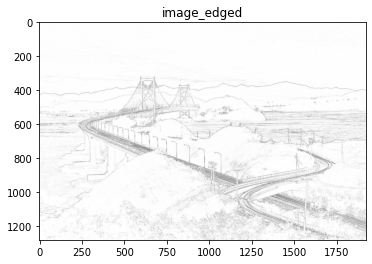

In [13]:
plt.imshow(image_blurred,  cmap="Greys")
plt.title("image_blurred")
plt.show()
plt.imshow(image_edges,  cmap="Greys")
plt.title("image_edged")
plt.show()

In [14]:
# CALCULATING GRADIENTS (of the picture)
# gradient = changing of each 1D-layer of picture

x_kernel = np.array([-1,0,1])
y_kernel = np.array([
    [-1],
    [0],
    [1],
])

In [15]:
y_gardients = cv2.filter2D(image_gray, -1, y_kernel)
x_gardients = cv2.filter2D(image_gray, -1, x_kernel)

# This can be broken, as we used sqrt, and sprt not return interger
# Fix by using astype(np.uint8)

# OVERFLOW: between types unit8 and float32
gardients = np.sqrt(y_gardients**2 + x_gardients**2).astype(np.uint8)

#gardients = np.sqrt(y_gardients**2 + x_gardients**2).astype(np.float32)

In [16]:
y_gardients.dtype

dtype('uint8')

In [17]:
np.max(y_gardients)

253

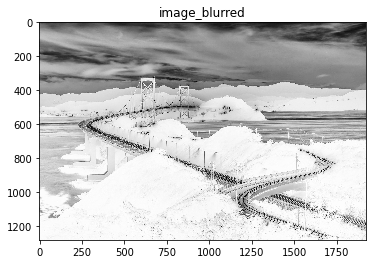

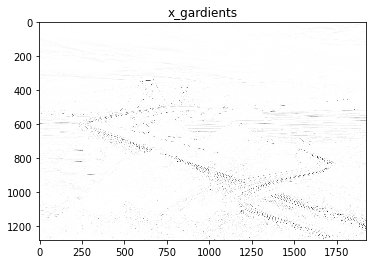

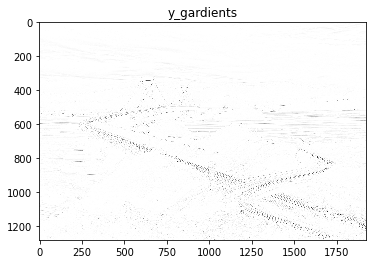

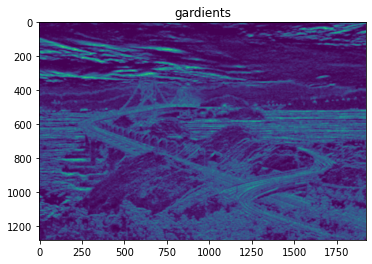

In [18]:
plt.imshow(image_gray,interpolation="nearest",  cmap="Greys")
plt.title("image_blurred")
plt.show()
plt.imshow(x_gardients,interpolation="nearest",  cmap="Greys")
plt.title("x_gardients")
plt.show()
plt.imshow(y_gardients,interpolation="nearest",  cmap="Greys")
plt.title("y_gardients")
plt.show()
plt.imshow(gardients,interpolation="bicubic")
plt.title("gardients")
plt.show()

In [19]:
# The above picture is 'exploded' in a manner, as the variable of image is of type which having value over than 255

image_gray_float = image_gray.astype(np.float32)

In [20]:
image_gray_float.dtype

dtype('float32')

In [21]:
np.max(image_gray_float)

255.0

In [22]:
np.min(image_gray_float)

0.0

In [23]:
x_kernel = np.array([-1,0,1]).astype(np.float32)
y_kernel = np.array([
    [-1],
    [0],
    [1],
]).astype(np.float32)

In [24]:
x_gradients = cv2.filter2D(image_gray_float,-1,x_kernel)
y_gradients = cv2.filter2D(image_gray_float,-1,y_kernel)
gardients = np.sqrt(y_gardients**2 + x_gardients**2).astype(np.float32)

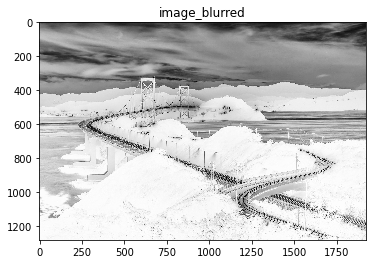

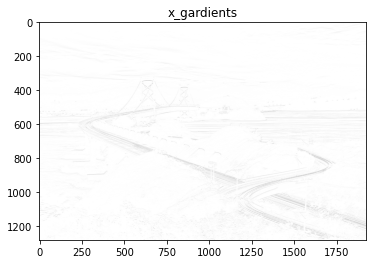

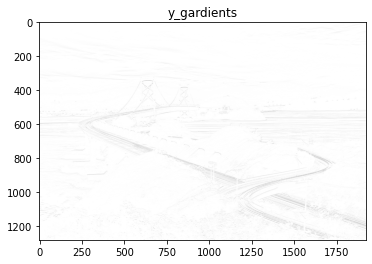

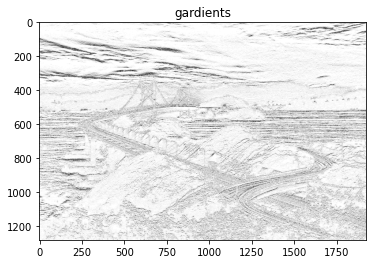

In [25]:
# The interpolation="nearest" will make the result be exploded, but same as Toni's version
plt.imshow(image_gray,interpolation="nearest",  cmap="Greys")
plt.title("image_blurred")
plt.show()
plt.imshow(x_gardients,  cmap="Greys")
plt.title("x_gardients")
plt.show()
plt.imshow(y_gardients,  cmap="Greys")
plt.title("y_gardients")
plt.show()
plt.imshow(gardients,  cmap="Greys")
plt.title("gardients")
plt.show()

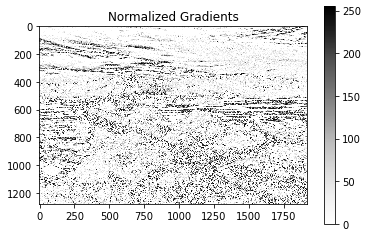

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have computed x_gardients and y_gardients as in your code

# Compute gradient magnitudes
gardients = np.sqrt(y_gardients**2 + x_gardients**2).astype(np.float32)

# Normalize gradient magnitudes to the range [0, 255]
gardients_normalized = cv2.normalize(gardients, None, 0, 255, cv2.NORM_MINMAX)

# Display the normalized gradient magnitudes
plt.imshow(gardients_normalized, interpolation="nearest", cmap="Greys")
plt.title("Normalized Gradients")
plt.colorbar()  # Add a colorbar to the image
plt.show()
